# Проверка гипотез

In [1]:
import analysis as an
import numpy as np
from scipy.stats import t, chi2, norm, f, mannwhitneyu

## Теория

Гипотезы бывают:
* простые (предположение о распределении однозначно его определяет, т.е. не останется неизвестных переменных (дисперсии, матожидания и тд)
* сложные (предполагаем матожидание, не зная дисперсии и аналогично)

Для проверки гипотезы считают некую статистику Z (из данных), которая в теории подчиняется одному из законов распределения. Далее строят критическую область (область, значения из которой мы считаем невозможными) и проверяют, находится ли статистика в области (областях).

Схема проверки статистических гипотез (p-value):
1. Формулируем нулевую и альтернативную гипотезы.  
  Нулевая гипотеза берется как "величина == значение", а альтернативная может быть одной из следующих:
  * "величина > значение"
  * "величина < значение"
  * "величина != значение"
2. Задаем уровень значимости alpha. 
  Данный уровень значимости (0.05, 0.01, ...) показывает, с какой вероятностью мы можем допустить ошибку первого рода
  (принять нулевую гипотезу, хотя верна альтернативная), другими словами: какова вероятность, что при истинной нулевой
  гипотезе значение статистики Z будет равно X или более экстремальному, X определяется как квантиль_alpha из
  соответствующего Z распределения.
3. Выбираем критерий и статистику критерия Z.  
  Выбор критерия зависит от того, что мы хотим проверить (матожидание, дисперсию, равенство двух дисперсий и т.д.), а
  также от того, что нам уже известно.
4. Вычисляем выборочное значение статистики критерия.  
  По формуле, соответствующей каждому критерию отдельно.
5. Вычисляем соответствующее p-value.  
  Оно же вероятность, что Z приняла выборочное значение статистики или более экстремальное.
6. Сравниваем p-value с alpha.  
  Если p-value более экстремально (дальше от 0.5, чем alpha, обычно менее alpha (т.е. меньше 0.05, например)), то нет
  причин отклонять нулевую гипотезу, если p-value менее экстремально (ближе к 0.5, больше 0.05, например), то
  отклоняем нулевую гипотезу.

1. Ошибка 1-го рода - отклонить нулевую гипотезу, когда она верна.  
  Допустимая вероятность - alpha, настоящая вероятность - p-value.
2. Ошибка 2-го рода - принять нулевую гипотезу, когда она неверна.  
  Равно вероятности, что верна альтернативная гипотеза, но была выбрана нулевая, в общем случае не считается легко.
  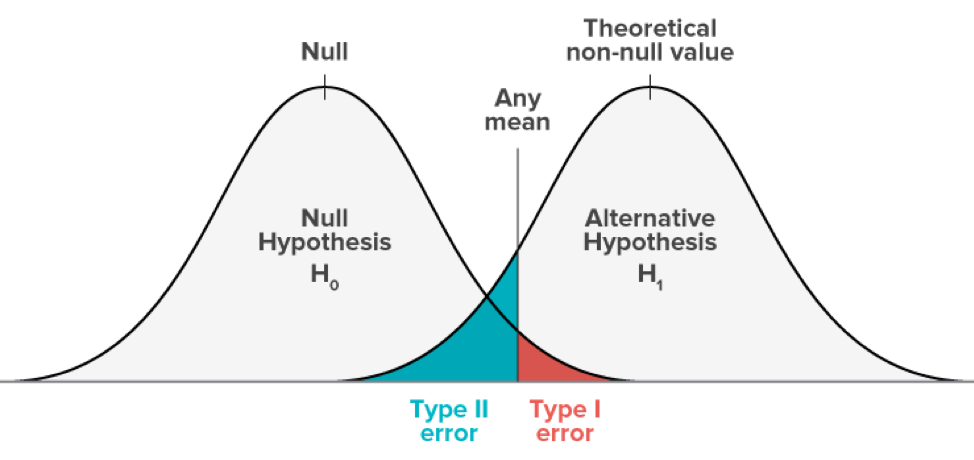

Альтернативная гипотеза формируется следующими возможными способами:
* $a > a_0$.  
  В таком случае критическая область строится от квантили 1-alpha и до +inf, p-value $= 1-Ф(Z)$.
* $a = a_1 > a_0$.  
  Аналогично вышеуказанному случаю.
* $a < a_0$.  
  Критическая область строится от -inf до квантили alpha, p-value $=Ф(Z)$
* $a != a_0$.  
  Критическая область состоит из двух областей (слева и справа): $(-\inf, U_{\alpha/2}) \bigcup (U_{1-\alpha/2}, +\inf)$, p-value $=2*min(Ф(Z), 1-Ф(Z))$
 
Здесь $a$ - искомое значение (матожидание, дисперсия и т.д.), $U_{\alpha}$ или $U_{\alpha/2}$ - значение квантили распределения, соответствующего распределению статистики Z, а $Ф(Z)$ - значение функции распределения, соответствующей распределению статистики Z (она же CDF, т.е. кумулятивная вероятность получить это значение или более экстремальное).  
Таким образом, если Z будет подчиняться стандартному нормальному распределению, то $Ф$ - CDF этого распределения, а также квантили считаются из него.

## Проверка гипотез о параметрах нормальной генеральной совокупности
### Проверка гипотезы о равенстве матожидания некоему значению

Рассмотрим задачу проверки гипотезы о среднем значении величины при известной или неизвестной дисперсии.
В таком случае в качестве статистики выбирается следующее выражение:  
$$Z = \dfrac{(x - \bar{x})}{\sigma/\sqrt{N}}$$, где x - выборочное среднее,
$\bar{x}$ - предполагаемое гипотезой значение среднего, $\sigma$ - корень из выборочной или истинной дисперсии (оно же стандартное отклонение) и N - количество измерений.

Если истинная дисперсия известна, то такая статистика подчиняется стандартному нормальному закону распределения N(0,1).  
Если истинная дисперсия неизвестна, то берется выборочная дисперсия и статистика Z подчиняется распределению Стьюдента с N-1 степенями свободы. В качестве дисперсии берется **несмещенная** оценка дисперсии (т.е. деленная на N-1)

#### Пример
Десять разных термометров сопротивления откалибровали по стандартному термометру. При показании стандартного термометра 1000мВ, испытуемые термометры показали:

986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983.

Можно ли считать эти отклонения допустимыми или на характеристики термометров повлиял некоторый фактор (при изготовлении или транспортировке)? Показания термометров считать распределенными нормально. Уровень значимости принять 0.05

In [2]:
a = np.array([986, 1005, 991, 994, 983, 1002, 996, 998, 1002, 983])

n = len(a)
alpha = 0.05

# считаем матожидание, дисперсию и статистику
m = a.mean()
d = sum((a - m)**2) / (n-1) # берем несмещенную оценку
Z = (m - 1000) / (np.sqrt(d) / np.sqrt(n))

# проверяем двухстороннюю область (т.к. альтернативная гипотеза звучит как a1 != a0)
p = 2 * min(t.cdf(Z, df=n-1), 1 - t.cdf(Z, df=n-1)) # дисперсию не знали
print(an.pformat([p], 3), f"H{int(p < alpha)}")
print(f"Критическая область: (-inf, {t.ppf(alpha/2, df=n-1)}) U ({t.ppf(1 - alpha/2, df=n-1)}, +inf)")
print(f"Z = {Z}")

0.043 H1
Критическая область: (-inf, -2.262157162740992) U (2.2621571627409915, +inf)
Z = -2.3554076516559617


### Проверка гипотезы о равенстве дисперсии некоему значению

В качестве статистики берется следующее выражение:
$$\frac{\sum(x_i - \bar{x})^2}{\sigma^2}$$,
где $\sigma^2$ - проверяемое значение дисперсии.

Такая статистика будет иметь распределение хи-квадрат с N-1 степенями свободы, если истинное матожидание неизвестно (мы брали выборочное среднее) и хи-квадрат с N степенями свободы, если оно известно. 

#### Пример
При отлаженном процессе наполнения тюбиков с зубной пастой в одну
упаковку в среднем помещается 100 мл зубной пасты, при этом дисперсия
объема зубной пасты в упаковке не должна превышать 9 (мл в квадрате).
Отдел контроля качества отобрал 25 упаковок и рассчитал несмещённую
оценку дисперсии $s^2=\frac{1}{n−1} * \sum{(x_i−\bar{x})^2}$, она составила 13.5.

Есть ли основания считать, что дисперсия объема зубной пасты
превышает допустимый предел? Используйте уровень значимости 0.05.
Предполагается, что объем зубной пасты в упаковке подчиняется
нормальному закону распределения.

Найдите p-значение, примите статистическое решение

In [3]:
alpha = 0.05
s1 = 13.5
s0 = 9
n = 25

# т.к. у нас известна несмещенная оценка дисперсии, домножим на n-1 для получения статистики
Z = (n-1) * s1 / s0

# проверяем правую область (т.к. альтернативная гипотеза звучит как s1 > s0)
p = 1 - chi2.cdf(Z, df=n-1) # матожидание неизвестно, т.к. отдел контроля качества брал выборочное среднее
print(an.pformat([p], 3), f"H{int(p < alpha)}")
print(f"Критическая область: ({chi2.ppf(1 - alpha, df=n-1)}, +inf)")
print(f"Z = {Z}")

0.055 H0
Критическая область: (36.41502850180731, +inf)
Z = 36.0


## Проверка гипотез о параметрах биномиального распределения
### Проверка гипотезы о равенстве p некоему значению
В качестве искомого параметра рассматривается p - вероятность успеха. Рассмотрим случай гипотез H0: p = p0 и H1: p = p1 > p0. В случае p1 < p0 можно инвертировать понятия успех/неудача и свести к указанному случаю.

В качестве статистики берется Z = m, где m - количество успехов. Далее определяется критическая область следующего вида:
$$ V_к = (np_0 + \sqrt{np_0(1-p_0)} * U_{1-\alpha_0}, +\inf)$$, где U - квантиль стандартного нормального распределения порядка $1 - \alpha_0$. Стоит заметить, что в общем случае правая граница критической области равна не $+\inf$, а числу всех испытаний.  
Вместо высчитывания p-value проверяется только вхождение статистики Z в критическую область, если Z попадает - отклоняем нулевую гипотезу, иначе - нет оснований отклонять.  
Вероятность ошибка первого рода стремится к $\alpha_0$ при увеличении числа измерений.

#### Пример
Производитель одежды хочет узнать, какие футболки предпочитает целевая группа: однотонные без рисунка или футболки с рисунком. Правда ли, что производителю следует выпускать больше однотонных футболок без рисунка, чем футболок с рисунком, чтобы удовлетворить пожулания покупателей?

Для проверки этой гипотезы  были опрошены 225 человек, 90 высказались в пользу футболок с рисунком, а 135 – в пользу футболок без рисунка.

Будем считать, что "успех" = покупатель предпочитает футболку без рисунка.
Используя приближенный критерий, постройте критическую область и примите статистическое решение при уровне значимости 0.01.

In [4]:
alpha = 0.01
n = 225
p0 = 0.5

Z = 135


V1 = n * p0 + np.sqrt(n*p0*(1-p0)) * norm.ppf(1-alpha)
print(f"Критическая область: ({V1}, {n})")
print(f"Z = {Z}, Z > V1: {Z > V1}")

Критическая область: (129.94760905530632, 225)
Z = 135, Z > V1: True


## Проверка критериев однородности
### Проверка гипотезы о равенстве дисперсий

Возьмем $S^2_X$ - несмещенную оценку дисперсии из выборки X длиной m, $S^2_Y$ - несмещенную оценку дисперсии из выборки Y длиной n, обе выборки взяты из нормального распределения.  
Тогда в качестве статистики можно взять $Z = \frac{S^2_X}{S^2_Y}$ (обычно берется отношение большей оценки к меньшей оценке). Такая статистика будет иметь распределение Фишера F с параметрами m-1 и n-1: F(m-1, n-1).  

Вычисление критической области и p-value происходит так же, как и для гипотез нормальной генеральной совокупности.

#### Пример
Два токарных автомата изготавливают детали по одному чертежу. Из продукции первого станка было отобрано 9 деталей, а из продукции второго - 11 деталей. Выборочные дисперсии контролируемого  размера, определенные по этим выборкам 5.9мкм2 и 23.3мкм2. Проверьте гипотезу о равенстве дисперсий при уровне значимости 0.01, если альтернативная гипотеза утверждает, что дисперсии не равны. (предполагаем, что контролируемый размер подчиняется нормальному закону распределения)

In [5]:
alpha = 0.01
m = 9
n = 11

d1 = 5.9
d2 = 23.3

Z = (d2 * n / (n-1)) / (d1 * m / (m-1)) # берем отношение большего к меньшему
p = 2*min(f.cdf(Z, n-1, m-1), 1 - f.cdf(Z, n-1, m-1))
print(f"Критическая область: (-inf, {f.ppf(alpha/2, n-1, m-1)}) U ({f.ppf(1 - alpha/2, n-1, m-1)}, +inf)")
print(f"Z = {Z}")
print(f"p-value = {p}, p-value < alpha: {p < alpha}")

Критическая область: (-inf, 0.16350773135811494) U (7.210635915223316, +inf)
Z = 3.8613935969868174
p-value = 0.06771319884993998, p-value < alpha: False


### Проверка гипотезы о равенстве матожиданий

В общем случае в качестве статистики берется следующее выражение: $$Z = \frac{\bar{x} - \bar{y}}{\sqrt{D(\bar{x} - \bar{y})}}$$, где D - дисперсия. Тем не менее, дисперсия может быть известна или неизвестна. Возможны три случая:
* Дисперсии известны.  
  В таком случае $D(\bar{x} - \bar{y}) = \frac{\sigma^2_1}{m} + \frac{\sigma^2_2}{n}$, статистика Z имеет стандартный нормальный закон распределения.
* Дисперсии неизвестны, но есть основания полагать, что они равны (см. проверку гипотезы о равенстве дисперсий).  
  В таком случае берутся несмещенные оценки дисперсий обоих выборок $s^2_1$ и $s^2_2$ и высчитывается общая несмещенная  оценка дисперсии $$S^2 = \frac{s^2_1 * (m-1) + s^2_2 * (n-1)}{m + n - 2}$$, после чего считается дисперсия: $D(\bar{x} - \bar{y}) = \frac{S^2}{m} + \frac{S^2}{n}$. Статистика Z будет иметь распределение Стьюдента с m+n-2 степенями свободы.
* Дисперсии неизвестны и есть основания полагать, что они не равны.  
  В таком случае берутся несмещенные оценки дисперсий обоих выборок $s^2_1$ и $s^2_2$ и высчитывается дисперсия
  $D(\bar{x} - \bar{y}) = \frac{s^2_1}{m} + \frac{s^2_2}{n}$. Статистика Z будет иметь распределение Стьюдента с K степенями свободы, где K вычисляется по следующей формуле (берется целая часть):
  $$K = \frac{(\frac{s^2_x}{m} + \frac{s^2_y}{n})^2}{\frac{(s^2_x/m)^2}{m-1} + \frac{(s^2_y/n)^2}{n-1}}$$

#### Пример
Можно ли считать, что средние двух нормально распределенных совокупностей равны, если выборочные средние и дисперсии, вычисленные по двум выборкам объема 16 и 9 равны соответственно $\bar{x_1}=12.57, D^∗_1=0.91,  \bar{x_2}=11.87, D^∗_2=1.51$? Известно, что дисперсии не  равны. Уровень значимости 0.02

In [6]:
alpha = 0.02

m = 16
x1 = 12.57
d1 = 0.91

n = 9
x2 = 11.87
d2 = 1.51

# считаем несмещенные оценки
s1 = d1 * m / (m-1)
s2 = d2 * n / (n-1)

# ищем K
k = an.get_student_k(s1, s2, m, n)

# статистика
Z = (x1 - x2) / np.sqrt(s1/m + s2/n)

# проверяем
p = 2*min(t.cdf(Z, k), 1 - t.cdf(Z, k))
print(f"Критическая область: (-inf, {t.ppf(alpha, k)}) U ({1 - t.ppf(alpha, k)}, +inf)")
print(f"Z = {Z}")
print(f"p-value = {p}, p-value < alpha: {p < alpha}")

Критическая область: (-inf, -2.28160356373812) U (3.28160356373812, +inf)
Z = 1.4016361972359104
p-value = 0.18444537108003667, p-value < alpha: False


### Критерий Стьюдента для парных выборок
Представим, что у нас есть выборка X и сделанная после нее выборка Y на тех же данных. Для того, чтобы ответить на вопрос,
отличается ли матожидание выборки Y от матожидания выборки X (т.е. поменялись ли данные), строится новая выборка
из их разности, после чего применяется обычный матаппарат вычисления неизвестного матожидания при неизвестной дисперсии.

#### Пример
У 28 пациентов, имевших сердечный приступ, измерили уровень холестерина в крови через 2 и через 4 дня после сердечного приступа. Изменился ли уровень холестерина при втором измерении по сравнению с первым?

Найдите p-значение и примите статистическое решение при уровне значимости 0.05

In [7]:
X = [270, 236, 210, 142, 280, 272, 160, 220, 226, 242, 186, 266, 206, 318, 294, 282, 234, 224, 276, 282, 360, 310, 280, 278, 288, 288, 244, 236]
Y = [218, 234, 214, 116, 200, 276, 146, 182, 238, 288, 190, 236, 244, 258, 240, 294, 220, 200, 220, 186, 352, 202, 218, 248, 278, 248, 270, 242]
a = np.array(X) - np.array(Y)

In [8]:
n = len(a)
alpha = 0.05

# считаем матожидание, дисперсию и статистику
m = a.mean()
d = sum((a - m)**2) / (n-1) # берем несмещенную оценку
Z = (m) / (np.sqrt(d) / np.sqrt(n))

# проверяем двухстороннюю область (т.к. альтернативная гипотеза звучит как a1 != a0)
p = 2 * min(t.cdf(Z, df=n-1), 1 - t.cdf(Z, df=n-1)) # дисперсию не знали
print(an.pformat([p], 3), f"H{int(p < alpha)}")
print(f"Критическая область: (-inf, {t.ppf(alpha/2, df=n-1)}) U ({t.ppf(1 - alpha/2, df=n-1)}, +inf)")
print(f"Z = {Z}")

0.003 H1
Критическая область: (-inf, -2.051830516480284) U (2.0518305164802833, +inf)
Z = 3.2189402179896827


### Непараметрические критерии однородности
Они же - критерии о наличии сдвига. Критерии показывают, существует ли константный сдвиг значений функции G(x) относительно функции F(x). Сдвиг должен быть положительным или отрицательным, если функци G(x) пересекает график F(x) - то данные критерии неприменимы.
### Критерий однородности Вилкоксона
Составим общий вариационный ряд из элементов X и Y = Z(X, Y), причем должно выполняться условие, что объем выборки Y не больше, чем объем выборки X.
X = (0, 3), Y = (1, 2), Z = (0, 1, 2, 3).  
Посчитаем ранги, соответствующие элементам выборки Y (2, 3).  
Статистикой критерия является $W = \sum{s_i}$, где $s_i$ - ранги элементов из выборки Y.  
* При условии F(x) >= G(x), критическая область выглядит следующим образом: $(c_1, mn + \frac{(m+1)m}{2})$
* При условии F(x) <= G(x): $(\frac{(m+1)m}{2}, c_2)$
* При условии F(x) != G(x): $(\frac{(m+1)m}{2}, c_3) \bigcup (c_4, mn + \frac{(m+1)m}{2})$

$c_1..c_4$ - некие точки, соответствующие тем или иным $\alpha$ значениям, подбираемые по таблицам Вилкоксона или с помощью матпакетов.  
Основной плюс данного критерия - нет необходимости предполагать, что совокупности распределены нормально.

#### Пример
Среднее артериальное давление после приема кокаина, мм рт. ст.

  Плацебо Нифедипин

    156   73
    171   81
    133   103
    102   88
    129   131
    150   106
    120   107
    110   111
    112   122
    130   108


Влияет ли Нифедипин на среднее артериальное давление после приема кокаина? 
Найдите область принятия гипотезы, приняв за $Y_i$ наблюдения артериального давления при приеме Нифедипина. Примите статистическое решение. Уровень значимости 0.05

In [9]:
placebo = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]
truth = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]

# находим вариационный ряд
y = [(i, 'p') for i in placebo] + [(i, 't') for i in truth]
y = sorted(y, key=lambda x: x[0])
y = [(x[0], x[1], i + 1) for i, x in enumerate(y)]

# считаем статистику
W = sum(x[2] for x in y if x[1] == 't')
print(f"W = {W}")

# для обеих выборок объемом 10 и alpha = 0.05 область принятия гипотезы располагается в (78, 132)
print(f"W in (78, 132): {78 < W < 132}")

W = 71
W in (78, 132): False


### Статистика Манна-Уитни
Данная статистика $U$ применяется в тех же случаях, что и статистика Вилкоксона (более того, с ней математически связана как $W = U + \frac{m(m+1)}{2}$).  
Статистика считается следующим образом: $$U = \sum_{i=1}^{n}\sum_{j=1}^{m}{I(X_i < Y_j)}$$, где I - индикаторная функция и принимает значение 1 в случае True ответа и значение 0 в случае False ответа.  
Критические области строятся аналогичным способом, что и для Вилкоксона.

### Непараметрические критерии однородности для парных выборок
### Критерий знаков
Критерий знаков позволяет проверить равенство вероятность P{z > 0} и P(z < 0) для случайной величины z, равной разнице между парными выборками.  
Статистика определяется как $L = \sum_{i=1}^n{I(z_i < 0)}$. В качестве нулевой гипотезы берется равенство вероятностей (их их значение = 1/2). Данная статистика имеет биномиальный закон распределения с числом испытаний N и вероятностью 1/2.  
Таким образом критические области выглядят следующим образом:
* $F(x) \geq G(x): V_k = (c_1, N]$
* $F(x) \leq G(x): V_k = [0, c_2)$
* $F(x) \neq G(x): V_k = [0, c_3) \bigcup (c_4, N]$